In [1]:
import pandas as pd
import numpy as np
import sklearn
import statistics as stat
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

### Preprocessing

In [2]:
# This will be our transformed dataframes
mathTransformed = pd.read_csv('Datasets/math_transformed.csv')
portTransformed = pd.read_csv('Datasets/port_transformed.csv')

In [3]:
'''
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target
'''
pass

In [4]:
for i in list(mathTransformed):
    if not str(mathTransformed[i][0]).isdigit() or not str(portTransformed[i][0]).isdigit():
        assert(False)

### We have finally one labeled / one hot vector encoded our input data and can now start learning.

In [5]:
targetColumn = ['G1']
featureColumns = [i for i in list(portTransformed) if i not in targetColumn]
featureColumnsNoGrades = [i for i in featureColumns if i not in ['G2', 'G3', 'G1']]
assert(len(featureColumns) == len(featureColumnsNoGrades)+2)

In [6]:
portX = portTransformed[featureColumns]
portXNoGrades = portTransformed[featureColumnsNoGrades]
mathX = mathTransformed[featureColumns]
mathXNoGrades = mathTransformed[featureColumnsNoGrades]
portY = portTransformed[targetColumn]
mathY = mathTransformed[targetColumn]

#### What's the naive error if we just predict the average and mean?

In [7]:
def calculateMAE(lst1, lst2):
    ''' 
    Calculates the mean absolute error between two lists
    '''
    assert(len(lst1) == len(lst2))
    totalError = 0.0
    for i in range(len(lst1)):
        totalError += abs(lst2[i] - lst1[i])
    return totalError / len(lst1)

In [8]:
def calculateMSE(lst1, lst2):
    ''' 
    Calculates the mean squared error between two lists
    '''
    assert(len(lst1) == len(lst2))
    totalError = 0.0
    for i in range(len(lst1)):
        totalError += (lst2[i] - lst1[i]) ** 2
    return totalError / len(lst1)

In [9]:
actualG1Math = list(mathTransformed['G1'])
actualG1Port = list(portTransformed['G1'])

In [10]:
mean_math = sum(actualG1Math) / len(actualG1Math)
mean_port = sum(actualG1Port)/ len(actualG1Port)
median_math = stat.median(actualG1Math)
median_port = stat.median(actualG1Port)

In [11]:
mean_math_lst = [mean_math for _ in range(len(actualG1Math))]
median_math_lst = [median_math for _ in range(len(actualG1Math))]
mean_port_lst = [mean_port for _ in range(len(actualG1Port))]
median_port_lst = [median_port for _ in range (len(actualG1Port))]

In [12]:
r2_score(mean_math_lst, actualG1Math)

0.0

In [13]:
print("MAE for mean, math " + str(calculateMAE(mean_math_lst, actualG1Math)))
print("MAE for median, math " + str(calculateMAE(median_math_lst, actualG1Math)))
print("MAE for mean, port " + str(calculateMAE(mean_port_lst, actualG1Port)))
print("MAE for median, port " + str(calculateMAE(median_port_lst, actualG1Port)))

MAE for mean, math 2.7514436789
MAE for median, math 2.74936708861
MAE for mean, port 2.20826636214
MAE for median, port 2.18489984592


In [14]:
print("MSE for mean, math " + str(calculateMSE(mean_math_lst, actualG1Math)))
print("MSE for median, math " + str(calculateMSE(median_math_lst, actualG1Math)))
print("MSE for mean, port " + str(calculateMSE(mean_port_lst, actualG1Port)))
print("MSE for median, port " + str(calculateMSE(median_port_lst, actualG1Port)))

MSE for mean, math 10.9891619933
MSE for median, math 10.9974683544
MSE for mean, port 7.35435575889
MSE for median, port 7.52234206471


##### Now, for some actual ML

In [15]:
def linearRegression(originalDf, targetColumn, featureColumns):
    '''
    Runs unregularized linear regression and returns the 
    R^2 and mean squared error (averaged over all folds 
    via cross validation)
    '''
    lm = linear_model.LinearRegression(normalize=True)
    X = originalDf[featureColumns]
    y = originalDf[targetColumn]
    scores = cross_validate(lm, X, y, scoring=['r2','neg_mean_squared_error', 'neg_mean_absolute_error'], cv=10, return_train_score=False)
    return lm, scores

In [16]:
def linearRegressionRidge(originalDf, targetColumn, featureColumns):
    '''
    Runs ridge regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters = {'alpha' : np.arange(0.0001, 0.01, 0.01)}
    scoringMethods = ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']
    test_scores = []
    lm = linear_model.Ridge(normalize=True)
    for score in scoringMethods:
        X = originalDf[featureColumns]
        y = originalDf[targetColumn]
        clf = GridSearchCV(lm, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.best_score_)
    return clf.best_estimator_, test_scores

In [17]:
def linearRegressionLasso(originalDf, targetColumn, featureColumns):
    '''
    Runs lasso regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters =  {'alpha' : np.arange(0.0001, 0.1, 0.01)}
    scoringMethods = ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']
    test_scores = []
    lm = linear_model.Lasso(normalize=True)
    for score in scoringMethods:
        X = originalDf[featureColumns]
        y = originalDf[targetColumn]
        clf = GridSearchCV(lm, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.best_score_)
    return clf.best_estimator_, test_scores

In [18]:
def returnAttributesWithLargestCoefficients(training, testing, model):
    '''
    This methods takes in a model and a training testing. It fits
    the model and then returns the attributes with their corresponding
    coefficient, ordered from largest to smallest.
    '''
    model.fit(training, testing)
    coefficients = model.coef_[0]
    finalLst = []
    attributes = list(training)
    assert(len(attributes) == len(coefficients))
    for i in range(len(attributes)):
        finalLst.append([attributes[i], coefficients[i]])
    finalLst.sort(key = lambda x: abs(x[1]), reverse=True)
    return finalLst

#### Let's first start with linear regression

In [19]:
def runLinearRegression(df, targetColumn, featureColumns):
    '''
    This function runs all the linear regression models on the specific
    dataset using specified target and feature columns and returns back
    the scores as a list of tuples (a,b, c) where a corresponds to the model, 
    b corresponds to the R^2 scores and c corresponds to the mean squared errors
    (over all runs).
    '''
    unregularized_lm, unregularized = linearRegression(df, targetColumn, featureColumns)
    ridge_lm, ridge = linearRegressionRidge(df, targetColumn, featureColumns)
    lasso_lm, lasso = linearRegressionLasso(df, targetColumn, featureColumns)
    return [[unregularized_lm, unregularized['test_r2'], unregularized['test_neg_mean_squared_error'], unregularized['test_neg_mean_absolute_error']],
            [ridge_lm, ridge[0], ridge[1], ridge[2]],
            [lasso_lm, lasso[0], lasso[1], lasso[2]]]

In [20]:
def return_residuals(model, df, col_to_predict):
    '''
    Using a 90/10 split of data, returns list of residuals for predictions
    of testing set.
    '''
    all_columns = list(df)
    all_X = [i for i in all_columns if i not in ['G1', 'G2', 'G3']]
    y = df[col_to_predict]
    X = df[all_X]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model.fit(X_train, y_train)
    all_residuals = []
    residuals = model.predict(X_test)
    y_test = list(y_test)
    for i in range(len(y_test)):
        residual = (y_test[i] - residuals[i])
        all_residuals.append(residual)
    return all_residuals

###### Portuguese 


######  Predicting G1

In [21]:
unregularized, ridge, lasso = runLinearRegression(portTransformed, targetColumn, featureColumnsNoGrades)

In [22]:
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[3].mean(), unregularized[3].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[3].mean(), ridge[3].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[3].mean(), lasso[3].std() * 2))

Unregularized accuracy: 0.16 (+/- 0.17)
Unregularized accuracy: -5.42 (+/- 4.21)
Unregularized accuracy: -1.82 (+/- 0.69)
Ridge accuracy: 0.16 (+/- 0.00)
Ridge accuracy: -5.41 (+/- 0.00)
Ridge accuracy: -1.82 (+/- 0.00)
Lasso accuracy: 0.16 (+/- 0.00)
Lasso accuracy: -5.40 (+/- 0.00)
Lasso accuracy: -1.82 (+/- 0.00)


In [23]:
port_lm_resid = return_residuals(lasso[0], portTransformed, 'G1')

###### Math


###### Predicting G1

In [24]:
unregularized, ridge, lasso = runLinearRegression(mathTransformed, targetColumn, featureColumnsNoGrades)

In [25]:
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[3].mean(), unregularized[3].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[3].mean(), ridge[3].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[3].mean(), lasso[3].std() * 2))

Unregularized accuracy: 0.06 (+/- 0.46)
Unregularized accuracy: -9.70 (+/- 4.64)
Unregularized accuracy: -2.56 (+/- 0.72)
Ridge accuracy: 0.06 (+/- 0.00)
Ridge accuracy: -9.70 (+/- 0.00)
Ridge accuracy: -2.56 (+/- 0.00)
Lasso accuracy: 0.10 (+/- 0.00)
Lasso accuracy: -9.30 (+/- 0.00)
Lasso accuracy: -2.53 (+/- 0.00)


In [26]:
math_lm_resid = return_residuals(lasso[0], mathTransformed, 'G1')

#### Let's now do SVM

In [27]:
from sklearn.svm import SVR

In [28]:
def SVM(originalDf, targetColumn, featureColumns):
    '''
    Runs ridge regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters = {'C' : np.arange(0.1, 10, .5)}
    test_scores = []
    X = originalDf[featureColumns]
    y = np.ravel(originalDf[targetColumn])
    svr = SVR()
    scoringMethods = ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']
    for score in scoringMethods:
        clf = GridSearchCV(svr, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.best_score_)
    return clf.best_estimator_, test_scores

###### Portuguese 


##### Predicting G1

In [29]:
port_svm_best, results = SVM(portTransformed, targetColumn, featureColumnsNoGrades)
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[0].mean(), results[0].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[1].mean(), results[1].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[2].mean(), results[2].std() * 2))

SVM accuracy: 0.11 (+/- 0.00)
SVM accuracy: -5.72 (+/- 0.00)
SVM accuracy: -1.88 (+/- 0.00)


In [30]:
port_svm_resid = return_residuals(port_svm_best, portTransformed, 'G1')

###### Math


##### Predicting G1

In [31]:
math_svm_best, results_math_svm = SVM(mathTransformed, targetColumn, featureColumnsNoGrades)
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results_math_svm[0].mean(), results_math_svm[0].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results_math_svm[1].mean(), results_math_svm[1].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results_math_svm[2].mean(), results_math_svm[2].std() * 2))

SVM accuracy: -0.01 (+/- 0.00)
SVM accuracy: -10.41 (+/- 0.00)
SVM accuracy: -2.64 (+/- 0.00)


In [32]:
math_svm_resid = return_residuals(math_svm_best, mathTransformed, 'G1')

# PLOTTING RESIDUALS

In [33]:
len(math_svm_resid), len(port_svm_resid)

(40, 65)

In [34]:
portS = ['Portuguese' for i in range(2*65)]
mathS = ['Math' for i in range(2*40)]
model = ['Linear regression' for i in range(65)] + ['SVM' for i in range(65)] + ['Linear regression' for i in range(40)] + ['SVM' for i in range(40)]
errors = port_lm_resid + port_svm_resid + math_lm_resid + math_svm_resid
subject = portS + mathS

In [35]:
len(math_lm_resid), len(port_lm_resid)

(40, 65)

In [36]:
d_port = {'Model':model, 'Residual Error': errors, 'Subject': subject}
df_port = pd.DataFrame(data=d_port)

In [37]:
df_port.head()

,Model,Residual Error,Subject
0,Linear regression,-3.691233,Portuguese
1,Linear regression,-0.635535,Portuguese
2,Linear regression,0.520285,Portuguese
3,Linear regression,0.096131,Portuguese
4,Linear regression,1.298886,Portuguese


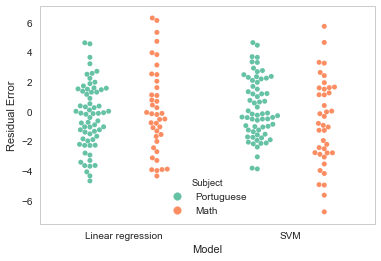

In [38]:
#ax = sns.violinplot(x = 'Model', y = 'Errors', data=df_port)
ax = sns.swarmplot(x = 'Model', y = 'Residual Error', hue='Subject', data=df_port, palette="Set2", split=True)
ax.grid(False)